# USDA Food Data
#### Weekly retail food sales by State and product category	 	 	 	 

Version  | Date | Author | Notes |
:-------:|:----:|:-------|:-----:|
0.1 |2 August 2023| Ken Dizon | Initial version |

**Objective:** Create a data visualizations using data from https://www.ers.usda.gov/data-products/weekly-retail-food-sales/ 
### Content
- Libraries
1. Data Exploration 
    * 1.1 Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Data Visualization

In [1]:
try:
    import numpy as np #math library
    import random
    import matplotlib.pyplot as plt #visualization
    %matplotlib inline
    import pandas as pd #dataframes
    
    print("Libraries imported successfully!")
except ImportError:
    print("Libraries not installed. Please install it to use this library.")

Libraries imported successfully!


________________________
# Load data
The Weekly Retail Food Sales series is based on proprietary scanner data from a nationally representative sample of retail food establishments collected by Circana (formerly Information Resources Inc. [IRI]). Sales data are reported weekly, beginning with the week ending October 6, 2019. The data was last update 7/7/2023.

In [2]:
#file_path = '/Users/Kenny/Documents/DataSets/StateAndCategory.xlsx'

In [3]:
#df = pd.read_excel(file_path)
#df.head()

In [4]:
# Format is messy
# Assign row as column headers
#header_row = 0
#df.columns = df.iloc[header_row]

# drop first row
#df = df.drop(index=0)
# drop column names labled NaN
#df = df.loc[:, df.columns.notna()]

#df.head()

In [5]:
# Saving cleaned/new_DF
#df.to_csv('/Users/Kenny/Documents/DataSets/Raw_USDA-FoodData.csv')

We have done some rough cleaning of the excel file and now we can re-load that file as csv

In [6]:
# Raw File
file_path = '/Users/Kenny/Documents/DataSets/Raw_USDA-FoodData.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Dollars 3 years ago,Unit sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change dollars 3 years,Percent change units 3 years
0,1,2019-10-06,Alabama,Alcohol,23611285.0,2974221.0,22449300.0,2979065.0,NaN,NaN,5.2,-0.2,NaN,NaN
1,2,2019-10-13,Alabama,Alcohol,23220758.0,2895573.0,23314625.0,2978312.0,NaN,NaN,-0.4,-2.8,NaN,NaN
2,3,2019-10-20,Alabama,Alcohol,21770283.0,2730939.0,21070374.0,2745973.0,NaN,NaN,3.3,-0.5,NaN,NaN
3,4,2019-10-27,Alabama,Alcohol,21956558.0,2764970.0,20188919.0,2651957.0,NaN,NaN,8.8,4.3,NaN,NaN
4,5,2019-11-03,Alabama,Alcohol,23183482.0,2872683.0,22565261.0,2884813.0,NaN,NaN,2.7,-0.4,NaN,NaN


________________________
# [1] Data Exploration

In [7]:
# Drop the first Index column
df = df.drop(df.columns[0], axis=1)

In [10]:
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows: 88929
Number of Columns: 13


In [11]:
# Taking a look at the columns, data rows, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88929 entries, 0 to 88928
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            88929 non-null  object 
 1   State                           88924 non-null  object 
 2   Category                        88924 non-null  object 
 3   Dollars                         88924 non-null  float64
 4   Unit sales                      88911 non-null  float64
 5   Dollars last year               88645 non-null  float64
 6   Unit sales last year            88621 non-null  float64
 7   Dollars 3 years ago             39456 non-null  float64
 8   Unit sales 3 years ago          39454 non-null  float64
 9   Percent change dollars 1 year   88645 non-null  float64
 10  Percent change units 1 year     88621 non-null  float64
 11  Percent change dollars 3 years  39456 non-null  float64
 12  Percent change units 3 years    

In [19]:
# Missing values
df.isnull().sum().sort_values(ascending=False)

Percent change units 3 years      49488
Unit sales 3 years ago            49475
Dollars 3 years ago               49473
Percent change dollars 3 years    49473
Unit sales last year                308
Percent change units 1 year         308
Dollars last year                   284
Percent change dollars 1 year       284
Unit sales                           18
State                                 5
Category                              5
Dollars                               5
Date                                  0
dtype: int64

In [13]:
# Visualize missing values
    #Numerically
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Percent change units 3 years,49488,0.556489
Unit sales 3 years ago,49475,0.556343
Dollars 3 years ago,49473,0.556320
Percent change dollars 3 years,49473,0.556320
Unit sales last year,308,0.003463
Percent change units 1 year,308,0.003463
Dollars last year,284,0.003194
Percent change dollars 1 year,284,0.003194
Unit sales,18,0.000202
State,5,0.000056


<AxesSubplot:>

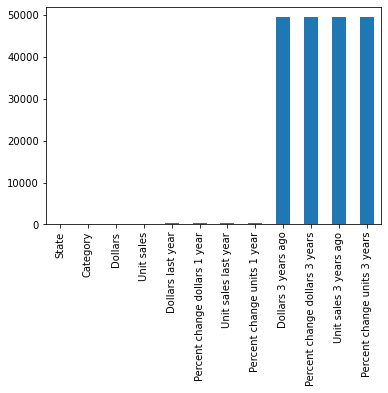

In [18]:
#Graphically
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

**NOTE:** 
- Date = datetime
    * I could subset this for each month
- I can drop columns [7,8,11,12] 
- As for missing NaNs for remainder of the columns, they do not impact the percetage of data. It is safe to remove these rows
- I can create a subset by state or group states for data Visualization

### 1.1 Cleaning

In [20]:
# Cleaning

# Convert the 'date' to datetime.date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # ERROR: df['Date'] = 'NA = data are not available'

# drop columns
df = df.dropna(subset=['Date'])
df = df.drop(df.columns[[7, 8, 11, 12]],axis = 1)

# drop missing values in rows
df = df.dropna()
df.shape

(88621, 9)

In [21]:
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows: 88621
Number of Columns: 9


In [22]:
# Check missing values
df.isnull().sum()

Date                             0
State                            0
Category                         0
Dollars                          0
Unit sales                       0
Dollars last year                0
Unit sales last year             0
Percent change dollars 1 year    0
Percent change units 1 year      0
dtype: int64

________________________
# [2] Exploratory Data Analysis

- Here I view what is this datasets composition and formulate the the extent of data to create subsets

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88621 entries, 0 to 88923
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           88621 non-null  datetime64[ns]
 1   State                          88621 non-null  object        
 2   Category                       88621 non-null  object        
 3   Dollars                        88621 non-null  float64       
 4   Unit sales                     88621 non-null  float64       
 5   Dollars last year              88621 non-null  float64       
 6   Unit sales last year           88621 non-null  float64       
 7   Percent change dollars 1 year  88621 non-null  float64       
 8   Percent change units 1 year    88621 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 6.8+ MB


#### Numeric

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dollars,88621.0,3.111518e+07,4.833450e+07,49487.0,5280502.0,14493740.0,36734896.0,645204422.0
Unit sales,88621.0,9.336495e+06,1.504020e+07,4437.0,1210676.0,4264968.0,10660907.0,222514654.0
Dollars last year,88621.0,2.897034e+07,4.483457e+07,50027.0,4922792.0,13590020.0,34401790.0,645079538.0
Unit sales last year,88621.0,9.329165e+06,1.505187e+07,4437.0,1209978.0,4243772.0,10610063.0,222471054.0
Percent change dollars 1 year,88621.0,8.192144e+00,1.475702e+01,-63.6,1.2,7.4,13.5,880.6
Percent change units 1 year,88621.0,1.026490e+00,1.424477e+01,-67.4,-4.9,-0.8,4.9,931.4


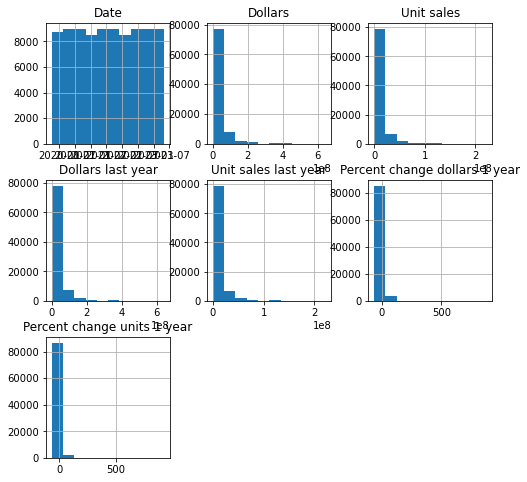

In [37]:
df.hist(figsize=(8, 8)) 
plt.show() 

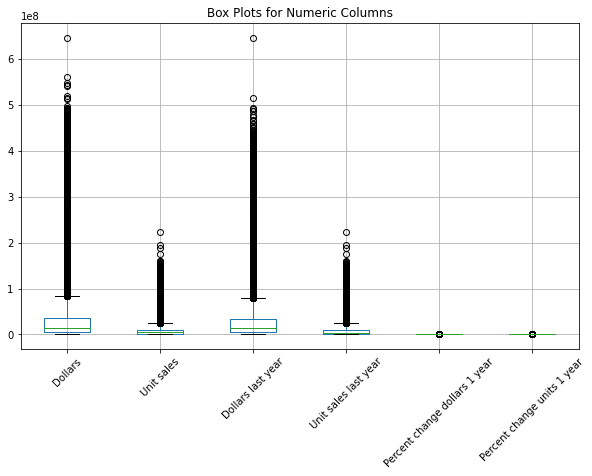

In [38]:
# Boxplot for Outlier Detection for all numeric columns

plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Box Plots for Numeric Columns")
plt.xticks(rotation=45)
plt.show()

#### Date

In [39]:
date_range_min = df['Date'].min()
date_range_max = df['Date'].max()
print(f"Date Range: {date_range_min} - {date_range_max}")

Date Range: 2019-10-06 00:00:00 - 2023-05-07 00:00:00


Note: Say I wanted to create a monthly/yearly totals. I will come back to this questions later in data preprocesing.

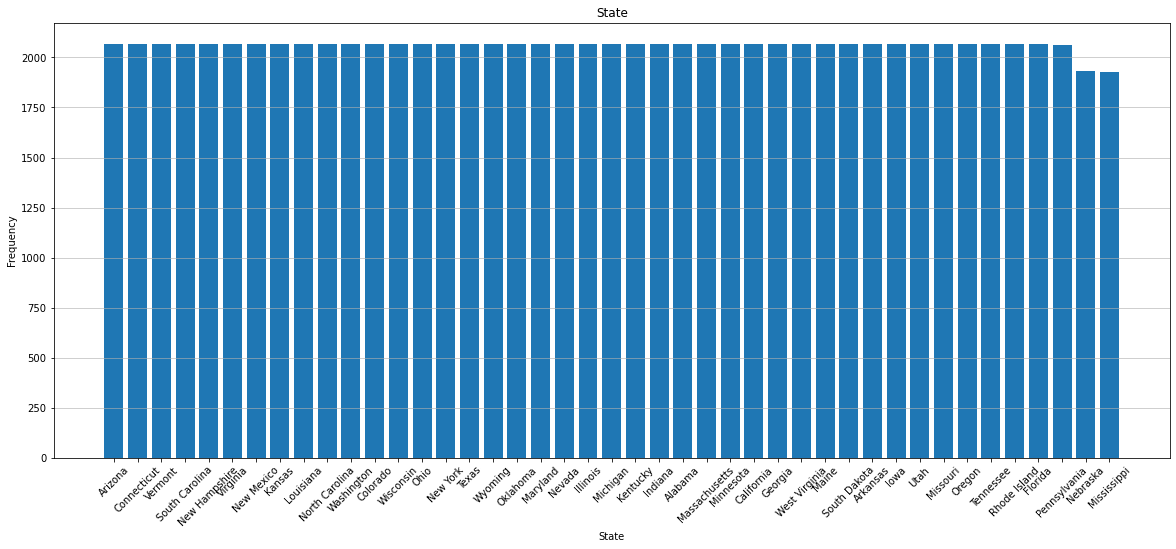

In [40]:
# State Counts
state_counts = df['State'].value_counts()

# size
plt.figure(figsize=(20, 8))
plt.bar(state_counts.index, state_counts.values)

plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('State')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

In [41]:
print('Number of US States:', df['State'].nunique())

Number of US States: 43


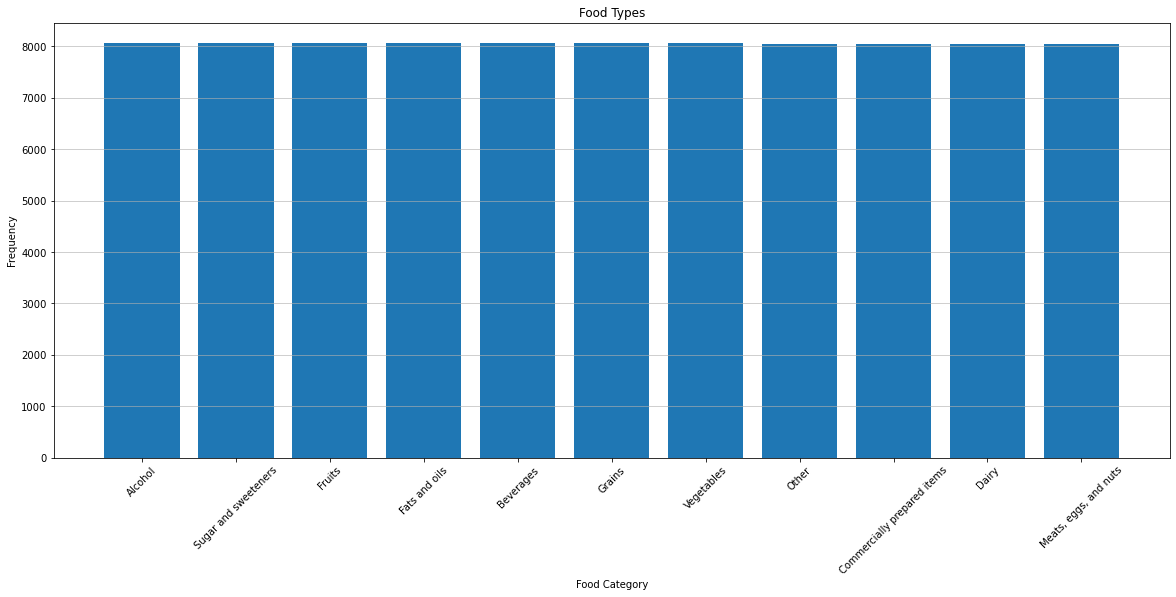

In [42]:
# Category
category_counts = df.Category.value_counts()

# size
plt.figure(figsize=(20, 8))
plt.bar(category_counts.index, category_counts.values)

plt.xlabel('Food Category')
plt.ylabel('Frequency')
plt.title('Food Types')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

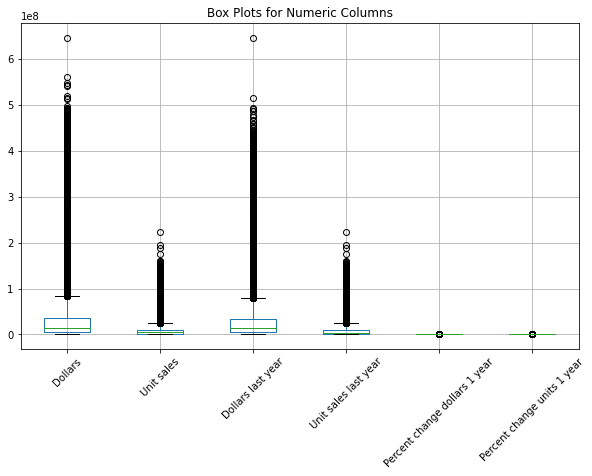

In [31]:
# Boxplot for Outlier Detection for all numeric columns

plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Box Plots for Numeric Columns")
plt.xticks(rotation=45)
plt.show()

________________________
# [3] Data Preprocessing

In [43]:
df['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [44]:
df['Category'].unique()

array(['Alcohol', 'Beverages', 'Commercially prepared items', 'Dairy',
       'Fats and oils', 'Fruits', 'Grains', 'Meats, eggs, and nuts',
       'Other', 'Sugar and sweeteners', 'Vegetables'], dtype=object)

#### User Input 

In [45]:
selected_state = 'Colorado' #str(input('Enter your State:'))
selected_year = 2020 #int(input('Enter your Year:'))
selected_month = 7 #int(input('Enter your Month:'))
selected_category = 'Beverages' #str(input('Enter your Category:'))

In [46]:
# State Subset
df2 = df[df['State'] == selected_state]
df2.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Percent change dollars 1 year,Percent change units 1 year
752,2019-10-06,Colorado,Alcohol,6818370.0,812881.0,2275113.0,241328.0,199.7,236.8
753,2019-10-13,Colorado,Alcohol,6752102.0,797992.0,2208511.0,231427.0,205.7,244.8
754,2019-10-20,Colorado,Alcohol,6733582.0,801081.0,2136801.0,226230.0,215.1,254.1
755,2019-10-27,Colorado,Alcohol,6699795.0,785174.0,2185748.0,231012.0,206.5,239.9
756,2019-11-03,Colorado,Alcohol,6683158.0,773529.0,2203943.0,229820.0,203.2,236.6


In [47]:
# Extract the year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Year Subset
subset_Year = df[df['Year'] == selected_year]
#subset_Year.head()

# Year-Month Subset
subset_YearMonth = df[(df['Year'] == selected_year) & (df['Month'] == selected_month)]
subset_YearMonth.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Percent change dollars 1 year,Percent change units 1 year,Year,Month
39,2020-07-05,Alabama,Alcohol,29682914.0,3325527.0,28576337.0,3404828.0,3.9,-2.3,2020,7
40,2020-07-12,Alabama,Alcohol,25817315.0,3008214.0,22465170.0,2847357.0,14.9,5.6,2020,7
41,2020-07-19,Alabama,Alcohol,26493111.0,3073839.0,23133694.0,2902702.0,14.5,5.9,2020,7
42,2020-07-26,Alabama,Alcohol,25483751.0,3004478.0,23363490.0,2921828.0,9.1,2.8,2020,7
227,2020-07-05,Arizona,Alcohol,48743770.0,5549362.0,41439145.0,5153157.0,17.6,7.7,2020,7


In [48]:
# State Specialization 
df3 = subset_Year[subset_Year['State'] == selected_state]
df3.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Percent change dollars 1 year,Percent change units 1 year,Year,Month
765,2020-01-05,Colorado,Alcohol,6859631.0,769412.0,3139154.0,325684.0,118.5,136.2,2020,1
766,2020-01-12,Colorado,Alcohol,5625317.0,690392.0,3594466.0,384630.0,56.5,79.5,2020,1
767,2020-01-19,Colorado,Alcohol,6084943.0,740940.0,3977296.0,428194.0,53.0,73.0,2020,1
768,2020-01-26,Colorado,Alcohol,5989725.0,736070.0,4057755.0,439236.0,47.6,67.6,2020,1
769,2020-02-02,Colorado,Alcohol,6786565.0,813487.0,4757617.0,511698.0,42.6,59.0,2020,2


In [49]:
# Category food type data
df4 = df[df['Category'] == selected_category]
df4.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Percent change dollars 1 year,Percent change units 1 year,Year,Month
8084,2019-10-06,Alabama,Beverages,45672546.0,20412409.0,43114637.0,19907130.0,5.9,2.5,2019,10
8085,2019-10-13,Alabama,Beverages,42870720.0,18983767.0,42568305.0,19359495.0,0.7,-1.9,2019,10
8086,2019-10-20,Alabama,Beverages,40012371.0,17521492.0,40389764.0,18295287.0,-0.9,-4.2,2019,10
8087,2019-10-27,Alabama,Beverages,38765535.0,16989314.0,37355821.0,16857336.0,3.8,0.8,2019,10
8088,2019-11-03,Alabama,Beverages,38673829.0,16846506.0,39081574.0,17587200.0,-1.0,-4.2,2019,11


In [50]:
# A look at the data selected
print(selected_state, '\n',
      'Year:', selected_year,  '\n',
      'Month:', selected_month, '\n',
      'Food:', selected_category)

Colorado 
 Year: 2020 
 Month: 7 
 Food: Beverages


# [4] Data Visualization
Plot  | Use Case |
:-----|:---------|
Line | [trends over time] [compare datasets with continuous variable] |
Bar | [compare different categories or groups] [discrete data that has distinct classes] |
Scatter | [examine the relationship between two continuous variables] [detect outliers] [identify clusters/groups] | 
Box | [compare distribution of a continuous variable across different classes] [examine summary statistics: spread/skewness/quartiles/outliers ] | 
Histogram | [data distribution] [shape of data] [skewness, variability, spread]

### 4.X Bar
- What are the 3 highest and lowest Dollar spending states in the US?

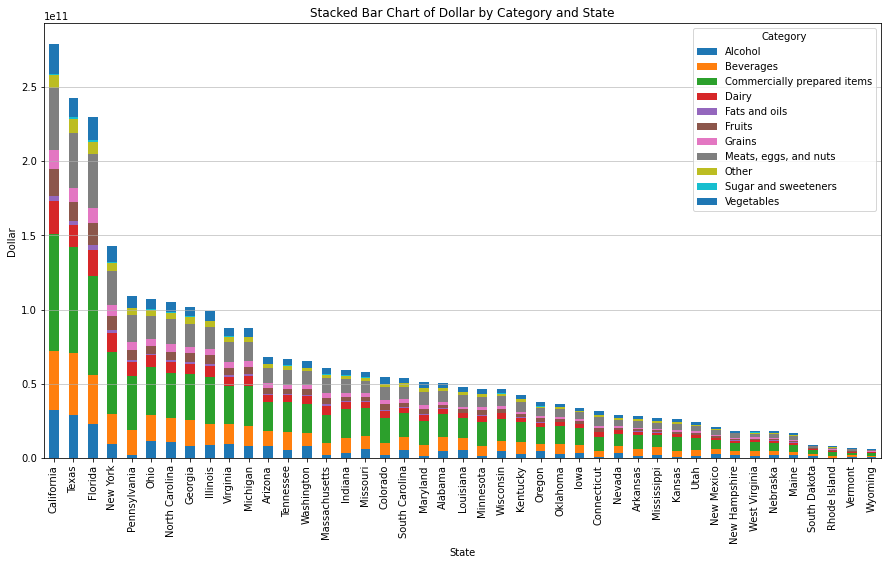

In [51]:
# Group the data by 'State' and 'Category' and sum the 'Dollar' values
grouped = df.groupby(['State', 'Category'])['Dollars'].sum().unstack()

# Calculate the total dollar amount for each state
state_totals = grouped.sum(axis=1)
# Sort the states by descending total dollar amount
sorted_states = state_totals.sort_values(ascending=False).index
# Reorder the grouped data based on the sorted states
state_spending = grouped.loc[sorted_states]


# Create a stacked bar chart
state_spending.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('State')
plt.ylabel('Dollar')
plt.title('Stacked Bar Chart of Dollar by Category and State')
plt.legend(title='Category')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 4.X Box

In [52]:
### Inputs ###

# Choose random states
random.seed(22)  # Change For reproducibility
selected_states = random.sample(df['State'].unique().tolist(), 5)

print(selected_year)
print(selected_states)
print(selected_category) 

2020
['Illinois', 'Maryland', 'Arizona', 'Washington', 'Oklahoma']
Beverages


In [53]:
# Filter the data for the selected states and 'x' category
filtered_data = subset_Year[(subset_Year['State'].isin(selected_states)) & 
                            (subset_Year['Category'] == selected_category)]
filtered_data.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Percent change dollars 1 year,Percent change units 1 year,Year,Month
8285,2020-01-05,Arizona,Beverages,40096908.0,15830901.0,37900788.0,15812688.0,5.8,0.1,2020,1
8286,2020-01-12,Arizona,Beverages,40369581.0,16207447.0,37972073.0,15871514.0,6.3,2.1,2020,1
8287,2020-01-19,Arizona,Beverages,40414486.0,16244940.0,37894220.0,15740366.0,6.7,3.2,2020,1
8288,2020-01-26,Arizona,Beverages,39229876.0,15945383.0,38106564.0,15903303.0,2.9,0.3,2020,1
8289,2020-02-02,Arizona,Beverages,41399121.0,16846741.0,40045027.0,17037373.0,3.4,-1.1,2020,2


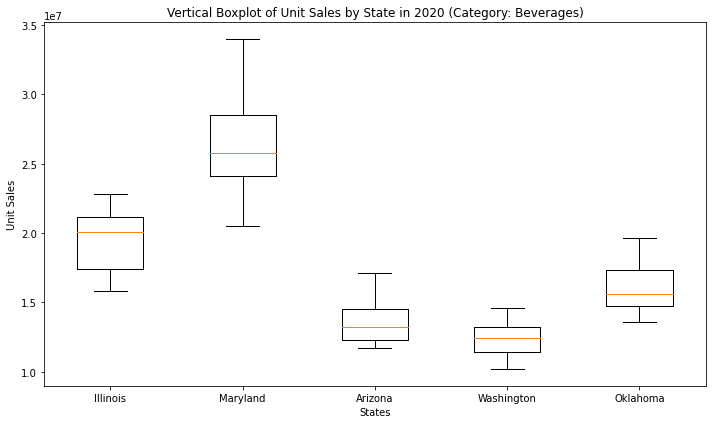

In [54]:
# Create a vertical boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data.groupby('State')['Unit sales'].apply(list).tolist())
plt.ylabel('Unit Sales')
plt.xlabel('States')
plt.title('Vertical Boxplot of Unit Sales by State in 2020 (Category: {})'.format(selected_category))
plt.xticks(range(1, len(selected_states) + 1), selected_states)
plt.tight_layout()
plt.show()

### 4.X Line

In [55]:
selected_state = 'Colorado' #str(input('Enter your State:'))
selected_category = 'Fruits' #str(input('Enter your category:'))

# Filter the DataFrame based on the selected categorical values
dfX = df[(df['State'] == selected_state) & (df['Category'] == selected_category)]

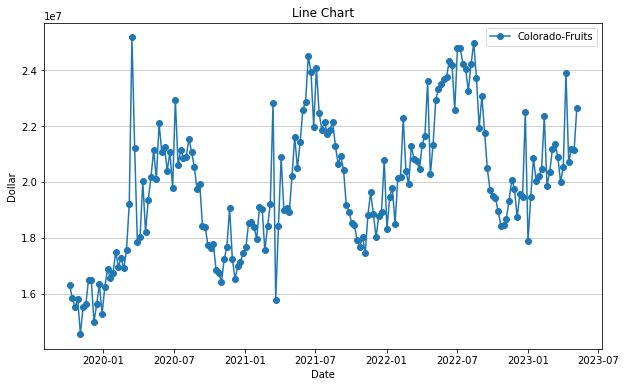

In [56]:
# Create a line chart
plt.figure(figsize=(10, 6))

plt.plot(dfX['Date'], dfX['Dollars'],
         marker='o', label=f'{selected_state}-{selected_category}')

plt.xlabel('Date')
plt.ylabel('Dollar')
plt.title('Line Chart')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

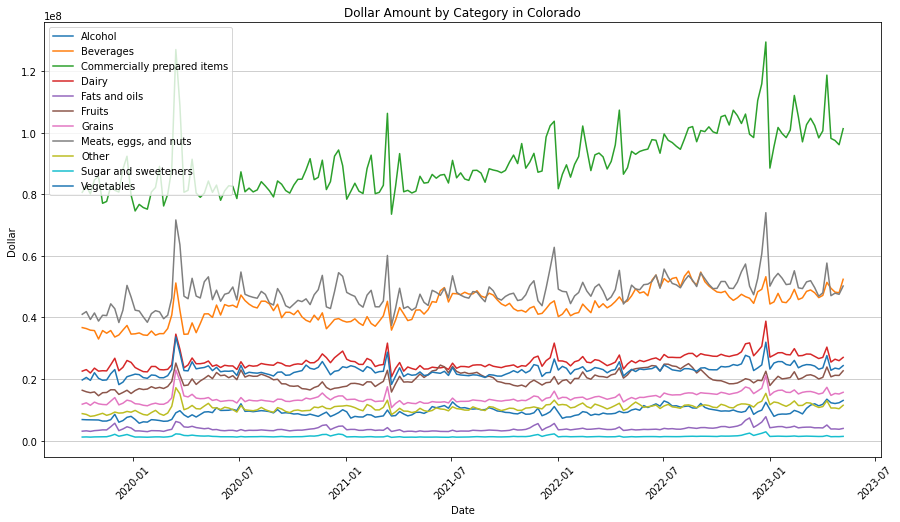

In [57]:
# Set figure size
plt.figure(figsize=(15, 8))

# Loop through unique values in the 'Category' column
for category in df2['Category'].unique():
    category_data = df2[df2['Category'] == category]
    
    plt.plot(category_data['Date'], category_data['Dollars'], label=category)
    
plt.xlabel('Date')
plt.ylabel('Dollar')
plt.title(f'Dollar Amount by Category in {selected_state}')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.xticks(rotation=45)
plt.show()

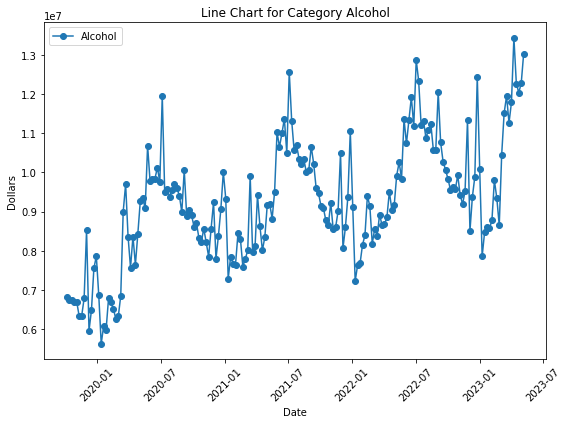

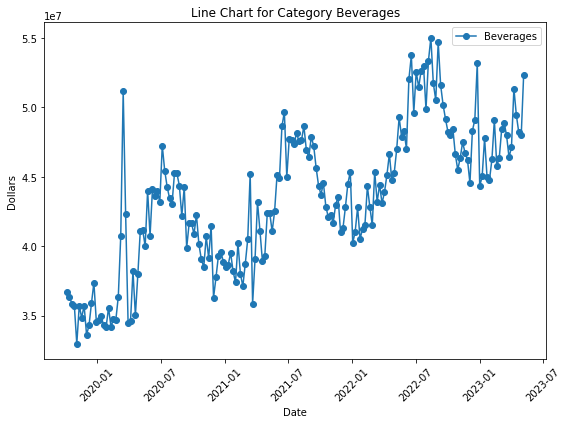

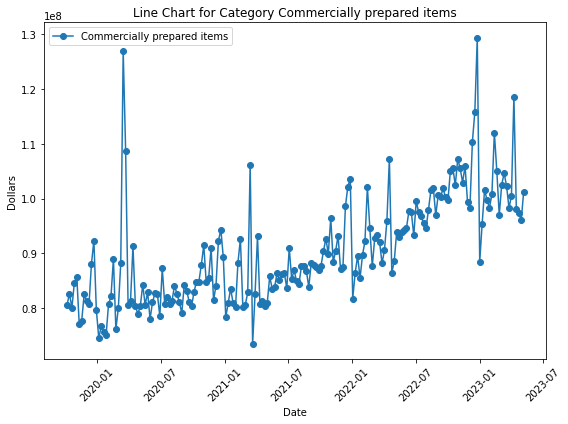

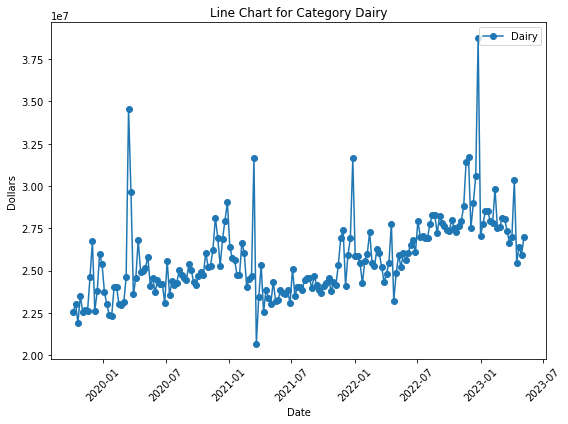

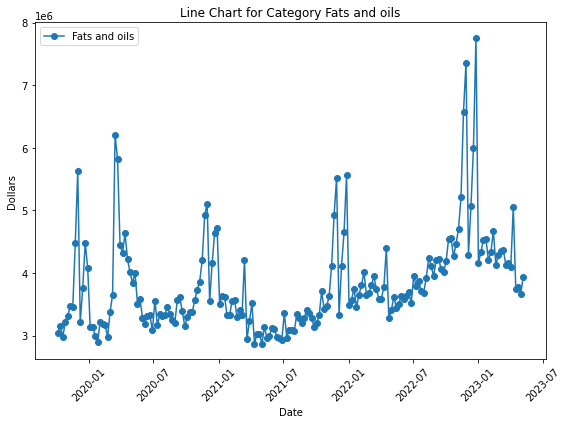

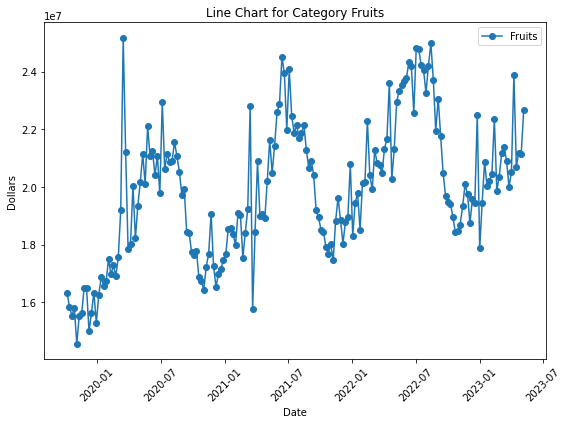

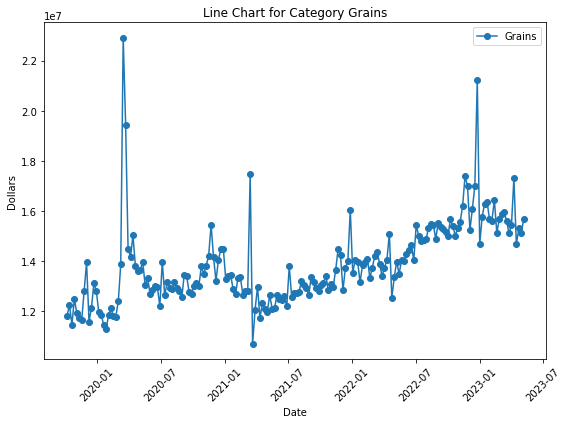

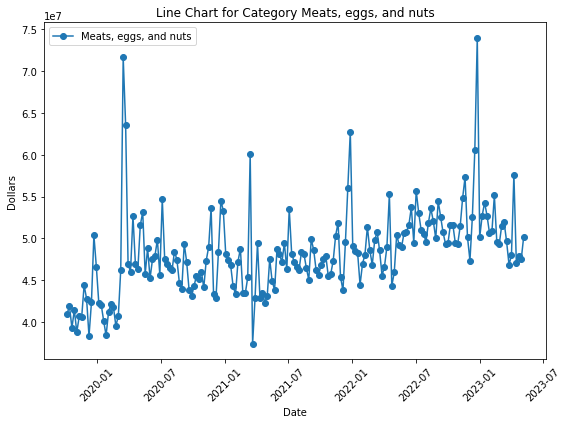

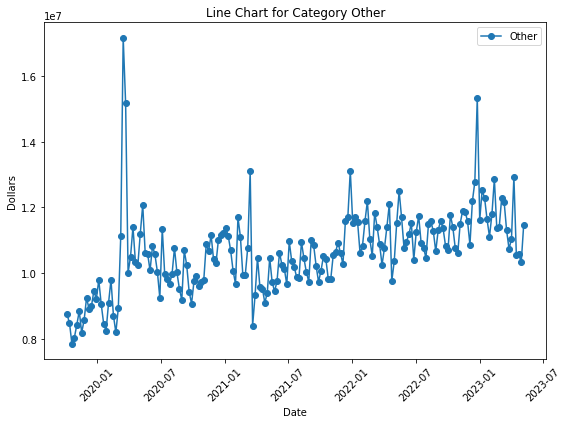

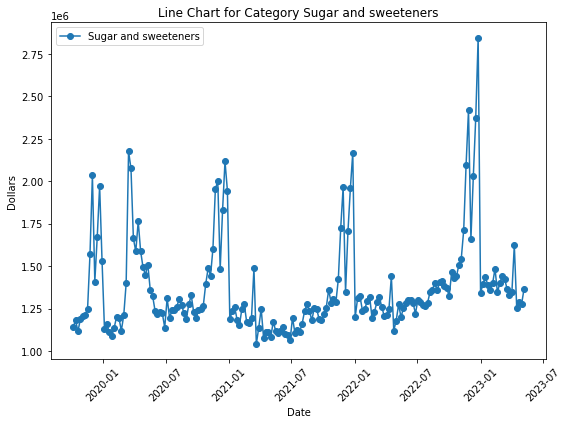

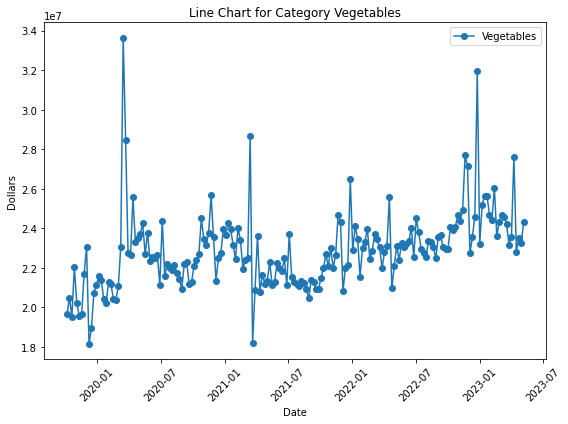

In [58]:
# Group the data by 'Category' and iterate through each group
for category, group in df2.groupby('Category'):
    plt.figure(figsize=(8, 6))  # Create a new figure for each line chart
    plt.plot(group['Date'], group['Dollars'], marker='o', label=category)
    plt.xlabel('Date')
    plt.ylabel('Dollars')
    plt.title(f'Line Chart for Category {category}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

### 4.X Scatter

________________________
# DevOps Test Env

**THINGS to Consider:**
- US view state vs state
- State (Geolocation) specific analysis
- Product specific analysis


`Question`: Compare Alcohol Sales between each state for the year 2020.